Temporal analysis on commuting flows between NYC counties from 24_02_2020 to 3_05_2020 from data weekly commuting dataset from article https://www.nature.com/articles/s41597-020-00734-5.
Safegraph data concerned a sample of the population, and from these data the total number of commuters with respect to the total population of each district was inferred, as explained in the article. Moreover, the numbers of commuters are distinct by week, and from these an average number of commuters per day has been calculated.
Below, a temporal analysis of these variations in commuting among borough is presented and data are normalized with respect to the first week's number of commuters of each borough.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

county_weekly_flows = pd.read_csv("/home/claudia/Scrivania/Tesi NYC pandemic /Weekly_flows/avg_weekly_flows_boroughs.csv")
county_weekly_flows.round(decimals=2);

GEOIDs for NYC Boroughs
Based on the ny17 dataset, we know the following information which will help us filter this dataset down to only the NYC boroughs. GEOIDs for NYC boroughs are as follows:

- New York County (Manhattan) - 36061
- Bronx County - 36005
- Kings County (Brooklyn) - 36047
- Queens County - 36081
- Richmond County (Staten Island) - 36085

In [2]:
weeks = ['24/02', '02/03', '09/03', '16/03', '23/03', '30/03', '06/04', '13/04', '20/04','27/04']

#fig, axs = plt.figure(figsize=(8,6))

In [3]:
#dataframe for Manhattan as origin of the flow

Manhattan_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36061)] #not normalized
destination_id = Manhattan_weekly_flows_nn['geoid_d']
Manhattan_weekly_flows_nn.drop(columns=['geoid_o','pop_flows','geoid_d'], inplace = True)
man_w1 = Manhattan_weekly_flows_nn['avg_daily_flow_w1']
Manhattan_weekly_flows =  Manhattan_weekly_flows_nn.mul(1/man_w1, axis=0) #normalized on avg values of first week
Manhattan_weekly_flows.insert(0, "geoid_d", destination_id, True) 
#Manhattan_weekly_flows

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


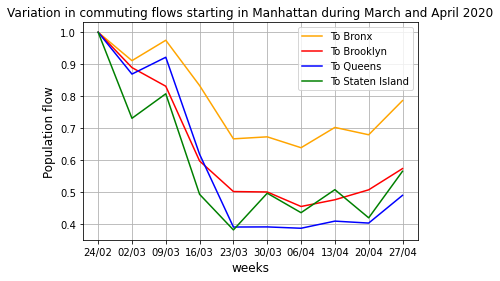

In [4]:
man_to_man = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36061)]
man_to_man.drop(columns=['geoid_d'], inplace=True)
man_to_bronx = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36005)]
man_to_bronx.drop(columns=['geoid_d'], inplace=True)
man_to_brook = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36047)]
man_to_brook.drop(columns=['geoid_d'], inplace=True)
man_to_quen = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36081)]
man_to_quen.drop(columns=['geoid_d'], inplace=True)
man_to_staten = Manhattan_weekly_flows.loc[(Manhattan_weekly_flows['geoid_d']==36085)]
man_to_staten.drop(columns=['geoid_d'], inplace=True)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Manhattan during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1,  = plt.plot(weeks,man_to_bronx.iloc[0], color='Orange', label ='To Bronx')
line2,  = plt.plot(weeks,man_to_brook.iloc[0], color='red', label='To Brooklyn')
line3,  = plt.plot(weeks,man_to_quen.iloc[0], color = 'b', label ='To Queens')
line4,  = plt.plot(weeks,man_to_staten.iloc[0], color='g', label = 'To Staten Island')
plt.legend(handles=[line1, line2, line3, line4], loc='upper right')
plt.grid()

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


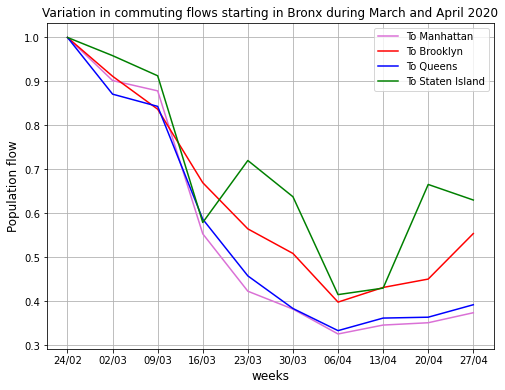

In [15]:
#dataframe for Bronx
Bronx_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36005)] #not normalized
destination_id = Bronx_weekly_flows_nn['geoid_d']
Bronx_weekly_flows_nn.drop(columns=['geoid_o','pop_flows', 'geoid_d'], inplace = True)
bronx_w1 = Bronx_weekly_flows_nn['avg_daily_flow_w1']
Bronx_weekly_flows = Bronx_weekly_flows_nn.mul(1/bronx_w1, axis=0) #normalized on avg values of first week 
Bronx_weekly_flows.insert(0, "geoid_d", destination_id, True)

bronx_to_man = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36061)]
bronx_to_man.drop(columns=['geoid_d'], inplace=True)
bronx_to_bronx = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36005)]
bronx_to_bronx.drop(columns=['geoid_d'], inplace=True)
bronx_to_brook = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36047)]
bronx_to_brook.drop(columns=['geoid_d'], inplace=True)
bronx_to_quen = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36081)]
bronx_to_quen.drop(columns=['geoid_d'], inplace=True)
bronx_to_staten = Bronx_weekly_flows.loc[(Bronx_weekly_flows['geoid_d']==36085)]
bronx_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Bronx during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1b,  = plt.plot(weeks,bronx_to_man.iloc[0], color='orchid', label ='To Manhattan')
line2b,  = plt.plot(weeks,bronx_to_brook.iloc[0], color='red', label='To Brooklyn')
line3b,  = plt.plot(weeks,bronx_to_quen.iloc[0], color= 'b', label ='To Queens')
line4b,  = plt.plot(weeks,bronx_to_staten.iloc[0], color='g', label = 'To Staten Island')
plt.legend(handles=[line1b, line2b, line3b, line4b], loc='upper right')
plt.grid()

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


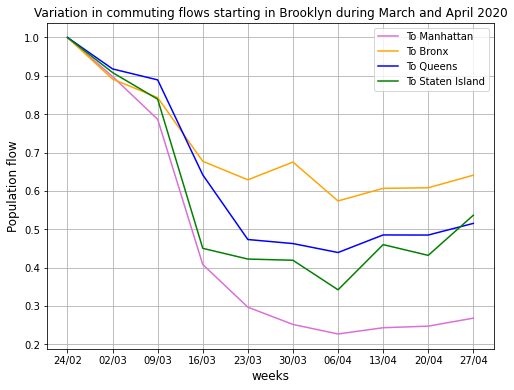

In [16]:
#dataframe for Brooklyn

Brook_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36047)] #not normalized
destination_id = Brook_weekly_flows_nn['geoid_d']
Brook_weekly_flows_nn.drop(columns=['geoid_o','pop_flows', 'geoid_d'], inplace = True)
brook_w1 = Brook_weekly_flows_nn['avg_daily_flow_w1']
Brook_weekly_flows = Brook_weekly_flows_nn.mul(1/brook_w1, axis=0) #normalized on avg values of first week 
Brook_weekly_flows.insert(0, "geoid_d", destination_id, True)

brook_to_man = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36061)]
brook_to_man.drop(columns=['geoid_d'], inplace=True)
brook_to_bronx = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36005)]
brook_to_bronx.drop(columns=['geoid_d'], inplace=True)
brook_to_brook = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36047)]
brook_to_brook.drop(columns=['geoid_d'], inplace=True)
brook_to_quen = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36081)]
brook_to_quen.drop(columns=['geoid_d'], inplace=True)
brook_to_staten = Brook_weekly_flows.loc[(Brook_weekly_flows['geoid_d']==36085)]
brook_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Brooklyn during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1o,  = plt.plot(weeks,brook_to_man.iloc[0], color='orchid', label ='To Manhattan')
line2o,  = plt.plot(weeks,brook_to_bronx.iloc[0], color='Orange', label='To Bronx')
line3o,  = plt.plot(weeks,brook_to_quen.iloc[0], color='b', label ='To Queens')
line4o,  = plt.plot(weeks,brook_to_staten.iloc[0], color='g', label = 'To Staten Island')
plt.legend(handles=[line1o, line2o, line3o, line4o], loc='upper right')
plt.grid()

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


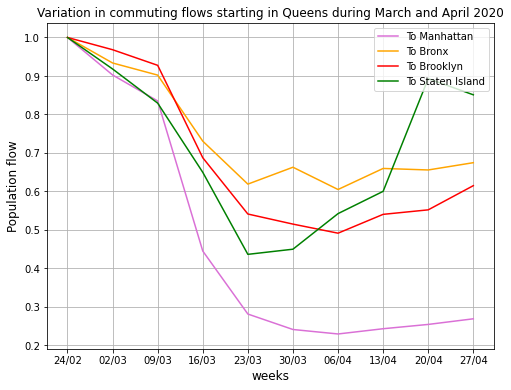

In [17]:
#dataframe for Queens
Queen_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36081)] #not normalized
destination_id = Queen_weekly_flows_nn['geoid_d']
Queen_weekly_flows_nn.drop(columns=['geoid_o','pop_flows', 'geoid_d'], inplace = True)
queen_w1 = Queen_weekly_flows_nn['avg_daily_flow_w1']
Queen_weekly_flows = Queen_weekly_flows_nn.mul(1/queen_w1, axis=0) #normalized on avg values of first week 
Queen_weekly_flows.insert(0, "geoid_d", destination_id, True)

queen_to_man = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36061)]
queen_to_man.drop(columns=['geoid_d'], inplace=True)
queen_to_bronx = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36005)]
queen_to_bronx.drop(columns=['geoid_d'], inplace=True)
queen_to_brook = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36047)]
queen_to_brook.drop(columns=['geoid_d'], inplace=True)
queen_to_queen = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36081)]
queen_to_queen.drop(columns=['geoid_d'], inplace=True)
queen_to_staten = Queen_weekly_flows.loc[(Queen_weekly_flows['geoid_d']==36085)]
queen_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Queens during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1q,  = plt.plot(weeks,queen_to_man.iloc[0], color='orchid', label ='To Manhattan')
line2q,  = plt.plot(weeks,queen_to_bronx.iloc[0], color='Orange', label='To Bronx')
line3q,  = plt.plot(weeks,queen_to_brook.iloc[0], color = 'red', label ='To Brooklyn')
line4q,  = plt.plot(weeks,queen_to_staten.iloc[0], color='g', label = 'To Staten Island')
plt.legend(handles=[line1q, line2q, line3q, line4q], loc='upper right')
plt.grid()

/home/claudia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


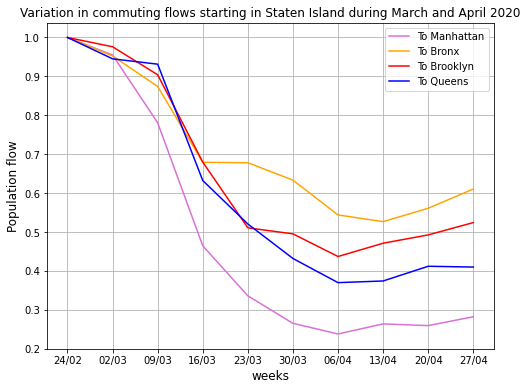

In [18]:
#dataframe for Staten Island

Stat_weekly_flows_nn = county_weekly_flows.loc[(county_weekly_flows['geoid_o']==36085)] #not normalized
destination_id = Stat_weekly_flows_nn['geoid_d']
Stat_weekly_flows_nn.drop(columns=['geoid_o','pop_flows', 'geoid_d'], inplace = True)
stat_w1 = Stat_weekly_flows_nn['avg_daily_flow_w1']
Stat_weekly_flows = Stat_weekly_flows_nn.mul(1/stat_w1, axis=0) #normalized on avg values of first week 
Stat_weekly_flows.insert(0, "geoid_d", destination_id, True)

stat_to_man = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36061)]
stat_to_man.drop(columns=['geoid_d'], inplace=True)
stat_to_bronx = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36005)]
stat_to_bronx.drop(columns=['geoid_d'], inplace=True)
stat_to_brook = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36047)]
stat_to_brook.drop(columns=['geoid_d'], inplace=True)
stat_to_quen = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36081)]
stat_to_quen.drop(columns=['geoid_d'], inplace=True)
stat_to_staten = Stat_weekly_flows.loc[(Stat_weekly_flows['geoid_d']==36085)]
stat_to_staten.drop(columns=['geoid_d'], inplace=True)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows starting in Staten Island during March and April 2020')
#line0 = plt.plot(weeks,man_to_man.iloc[0], linewidth=2, color='m')
line1s,  = plt.plot(weeks,stat_to_man.iloc[0], color='orchid', label ='To Manhattan')
line2s,  = plt.plot(weeks,stat_to_bronx.iloc[0], color='Orange', label='To Bronx')
line3s,  = plt.plot(weeks,stat_to_brook.iloc[0], color= 'red', label ='To Brooklyn')
line4s,  = plt.plot(weeks,stat_to_quen.iloc[0], color='b', label = 'To Queens')
plt.legend(handles=[line1s, line2s, line3s, line4s], loc='upper right')
plt.grid()

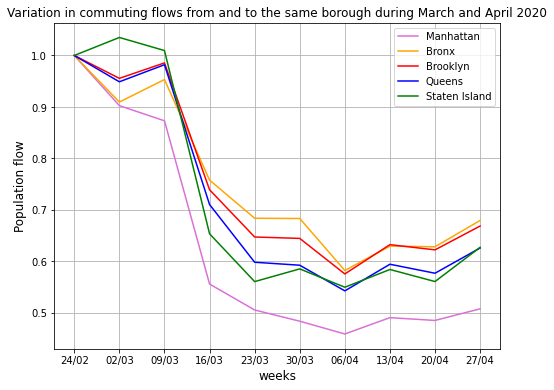

In [19]:
#plot for commuting from and to the same borough
plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('weeks', fontsize=12)
plt.ylabel('Population flow', fontsize=12)
plt.title('Variation in commuting flows from and to the same borough during March and April 2020')

line1p,  = plt.plot(weeks,man_to_man.iloc[0], color='orchid', label ='Manhattan')
line2p,  = plt.plot(weeks,bronx_to_bronx.iloc[0], color='Orange', label='Bronx')
line3p,  = plt.plot(weeks,brook_to_brook.iloc[0], color = 'red', label ='Brooklyn')
line4p,  = plt.plot(weeks,queen_to_queen.iloc[0], color='b', label = 'Queens')
line5p,  = plt.plot(weeks,stat_to_staten.iloc[0], color = 'g', label = 'Staten Island')
plt.legend(handles=[line1p, line2p, line3p, line4p, line5p], loc='upper right')
plt.grid()

### Overall Plot for varitions in commuting between March April 2020

The average number of daily commuters showed evident variations during the months of March April 2020, with substantial differences in each week for the different neighborhoods of NYC. For a more effective visualization, data are normalized with respect to the first week's data of commuting for each borough.
From the graphics below, it's evident that journeys to the Manhattan district have significantly decreased compared to those to other neighborhood: this could probably be linked to the possibility of citizens to to take government measures imposed during the first peak of the pandemic and operate smart-working according to the employment sector. The neighborhoods where internal commuting has decreased the fewer are Bronx and Brooklyn: around the 30/40%. While in Manhattan the average number of daily journeys has dropped by up to 55%.

(si potrebbe qui inserire una legenda dell'occupazione per borough e del numero di abitanti)

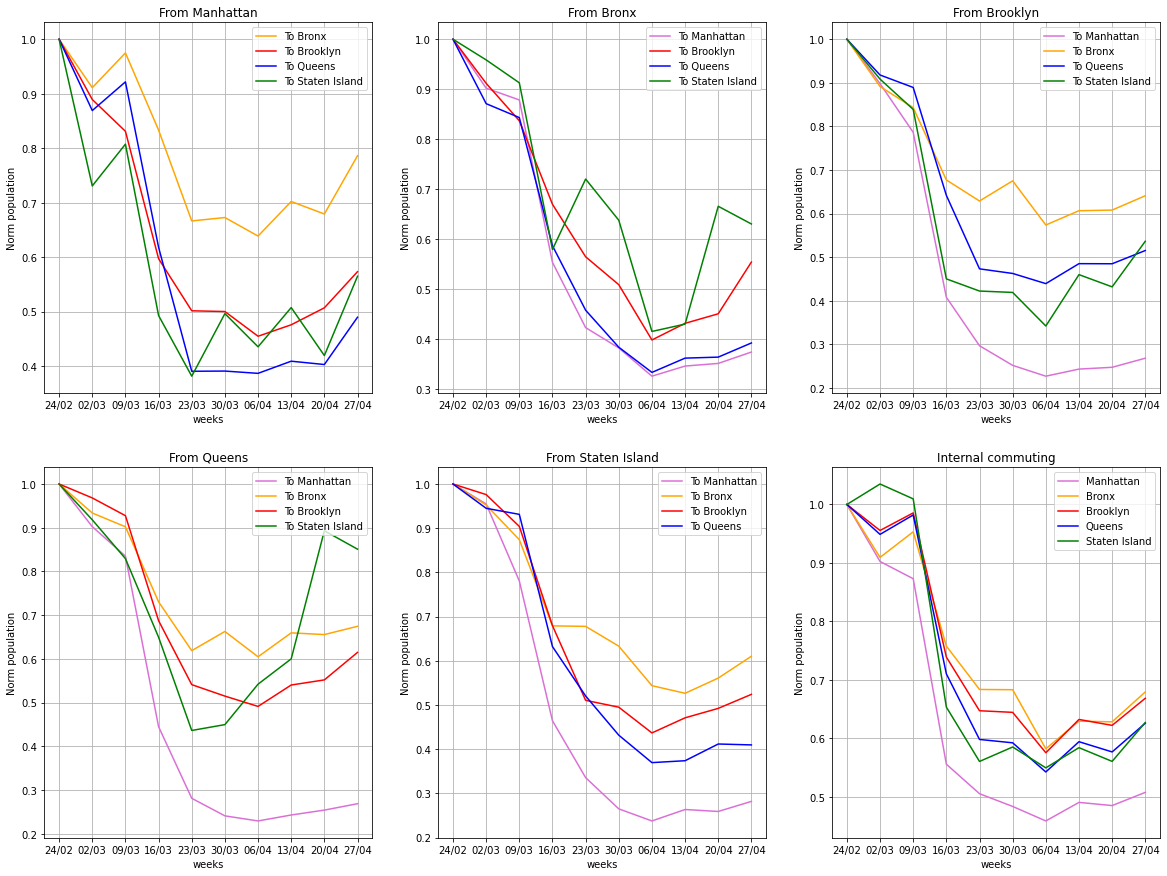

In [21]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (20,15))

ax1.plot(weeks,man_to_bronx.iloc[0], color='Orange', label ='To Bronx')
ax1.plot(weeks,man_to_brook.iloc[0], color='red', label='To Brooklyn')
ax1.plot(weeks,man_to_quen.iloc[0], color = 'b', label ='To Queens')
ax1.plot(weeks,man_to_staten.iloc[0], color='g', label = 'To Staten Island')
ax1.set_title('From Manhattan')
ax1.legend(handles=[line1, line2, line3, line4], loc='upper right')
ax1.grid()
ax2.plot(weeks,bronx_to_man.iloc[0], color='orchid', label ='To Manhattan')
ax2.plot(weeks,bronx_to_brook.iloc[0], color='red', label='To Brooklyn')
ax2.plot(weeks,bronx_to_quen.iloc[0], color= 'b', label ='To Queens')
ax2.plot(weeks,bronx_to_staten.iloc[0], color='g', label = 'To Staten Island')
ax2.set_title('From Bronx')
ax2.legend(handles=[line1b, line2b, line3b, line4b], loc='upper right')
ax2.grid()
ax3.plot(weeks,brook_to_man.iloc[0], color='orchid', label ='To Manhattan')
ax3.plot(weeks,brook_to_bronx.iloc[0], color='Orange', label='To Bronx')
ax3.plot(weeks,brook_to_quen.iloc[0], color='b', label ='To Queens')
ax3.plot(weeks,brook_to_staten.iloc[0], color='g', label = 'To Staten Island')
ax3.set_title('From Brooklyn')
ax3.legend(handles=[line1o, line2o, line3o, line4o], loc='upper right')
ax3.grid()
ax4.plot(weeks,queen_to_man.iloc[0], color='orchid', label ='To Manhattan')
ax4.plot(weeks,queen_to_bronx.iloc[0], color='Orange', label='To Bronx')
ax4.plot(weeks,queen_to_brook.iloc[0], color = 'red', label ='To Brooklyn')
ax4.plot(weeks,queen_to_staten.iloc[0], color='g', label = 'To Staten Island')
ax4.set_title('From Queens')
ax4.legend(handles=[line1q, line2q, line3q, line4q], loc='upper right')
ax4.grid()
ax5.plot(weeks,stat_to_man.iloc[0], color='orchid', label ='To Manhattan')
ax5.plot(weeks,stat_to_bronx.iloc[0], color='Orange', label='To Bronx')
ax5.plot(weeks,stat_to_brook.iloc[0], color= 'red', label ='To Brooklyn')
ax5.plot(weeks,stat_to_quen.iloc[0], color='b', label = 'To Queens')
ax5.set_title('From Staten Island')
ax5.legend(handles=[line1s, line2s, line3s, line4s], loc='upper right')
ax5.grid()

ax6.plot(weeks,man_to_man.iloc[0], color='orchid', label ='Manhattan')
ax6.plot(weeks,bronx_to_bronx.iloc[0], color='Orange', label='Bronx')
ax6.plot(weeks,brook_to_brook.iloc[0], color = 'red', label ='Brooklyn')
ax6.plot(weeks,queen_to_queen.iloc[0], color='b', label = 'Queens')
ax6.plot(weeks,stat_to_staten.iloc[0], color = 'g', label = 'Staten Island')
ax6.set_title('Internal commuting')
ax6.legend(handles=[line1p, line2p, line3p, line4p, line5p], loc='upper right')
ax6.grid()

for ax in fig.get_axes():
    ax.set(xlabel='weeks', ylabel='Norm population')

#for ax in fig.get_axes():
#    ax.label_outer()